In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Виконаємо завантаження та підготовку даних з набору даних Fashion MNIST для навчання моделі.

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

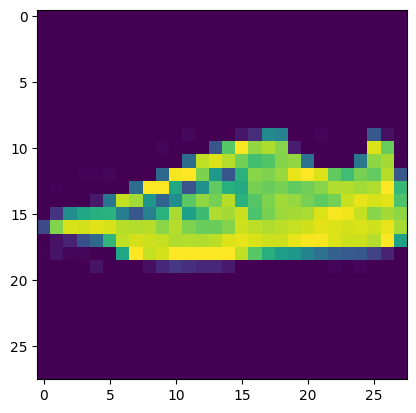

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])

Виконаємо побудову згорткової нейронної мережі

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\ricky\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Наступним кроком виконаємр  компіляцію та навчання нашої згорткової нейронної мережі на тренувальних даних. Ми також використаємо валідаційні дані для оцінки продуктивності моделі під час навчання.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7350 - loss: 0.7325 - val_accuracy: 0.8631 - val_loss: 0.3729
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8748 - loss: 0.3440 - val_accuracy: 0.8843 - val_loss: 0.3175
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8958 - loss: 0.2879 - val_accuracy: 0.8912 - val_loss: 0.3099
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9074 - loss: 0.2556 - val_accuracy: 0.8912 - val_loss: 0.2955
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9172 - loss: 0.2294 - val_accuracy: 0.8949 - val_loss: 0.2875
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9256 - loss: 0.2035 - val_accuracy: 0.9006 - val_loss: 0.2670
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9312 - loss: 0.1835 - val_accuracy: 0.9054 - val_loss: 0.2753
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9363 -

Варто зазначити, що навчання моделі тривало 3 хвилини (порівняно з нейронною мережею у минулому завданні)

Виведемо метрики для оцінки точності та втрат на тестових даних

In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9011 - loss: 0.3108
Test accuracy: 0.9031999707221985


Порівняно з результатом попередньої домашньої роботи - маємо приріст в точності 2,92% при значно швидшому навчання моделі

Виведемо графіки ефективності навчання нейронної мережі з відображеннями збільшення точності під час навчання та зменшення похибки на тестових даних

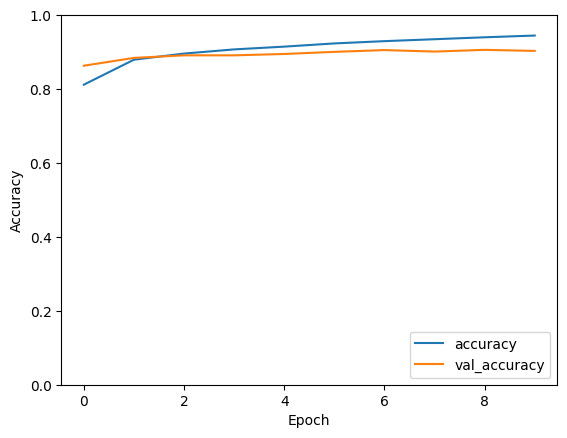

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

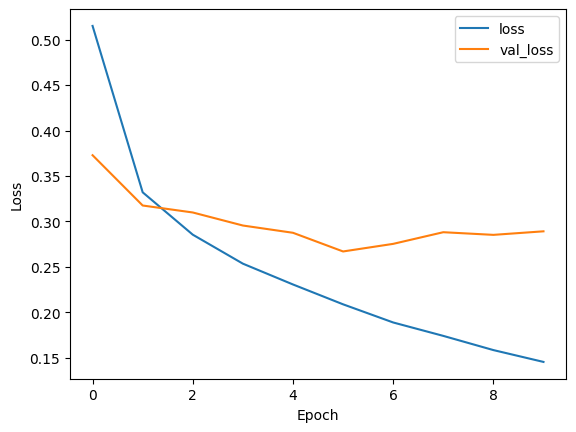

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

**Висновок:**

Ми створили та навчили згорткову нейронну мережу для класифікації зображень з набору даних Fashion MNIST. Після навчання мережі ми оцінили її точність на тестовому наборі даних та відобразили графіки точності та втрат під час навчання та валідації. Ми також порівняли отриману точність з результатами попереднього завдання, де ми використовували багатошарову нейронну мережу.

Цей експеримент дозволив нам переконатися в тому, що згорткова нейронна мережа ефективно працює для класифікації зображень Fashion MNIST та може досягати високої точності , навіть більшої за багатошарову модель при значно коротшому часі навчанн мережі.

У висновку, оцінвиши ефективноість згорткової мережі ми досягли приросту точності в 2,92%. Можна звісно зробити більш тонкі налаштування гіперпараметрів та підібрати інші варіанти архітектури для збільшення точності. Тим не менш на даному прикладі ми вєе спостерігаємо наглядну ефективність згорткової нейронної мережі для даного датасету.